### Tareas: Análisis Descriptivo del Inventario Consolidado

**Descripción:**

#### Objetivo:
Realizar un análisis descriptivo detallado del archivo consolidado de inventario de joyería para obtener información valiosa sobre los proveedores, costos, precios de venta al público y distribución de tipos de joya.

#### Tareas:

1. **Análisis de Proveedores:**
   - Contar la cantidad de ítems que tiene cada proveedor.

2. **Proveedores con Mayor Valor de Compra:**
   - Identificar al proveedor al que más se le ha comprado en dólares utilizando la columna `costo`.

3. **Distribución de Costos y Precios de Venta al Público:**
   - Generar un histograma para visualizar la distribución de los costos y los precios de venta al público (PVP) de las joyas de acero y plata.

4. **Estadísticas Descriptivas por Tipo de Joya y Categoría:**
   - Calcular el mínimo, Q25, mediana, Q75 y máximo de cada tipo de joya (`source`) por cada categoría (`plata` y `acero`).

5. **Tipo de Joya más Común por Material:**
   - Identificar el tipo de joya (anillos, pulseras, etc.) más común para cada material (`plata` y `acero`).

6. **Análisis de Proporción de Inventario por Material:**
   - Calcular la proporción del inventario total que corresponde a `plata` y `acero`.

7. **Análisis de Proporción de Inventario por Tipo de Joya:**
   - Calcular la proporción de cada tipo de joya (anillos, pulseras, cadenas, etc.) en el inventario total.

8. **Análisis de Costo Promedio por Tipo de Joya y Categoría:**
   - Calcular el costo promedio por cada tipo de joya (`source`) y categoría (`plata` y `acero`).

9. **Comparación de Márgenes de Ganancia:**
   - Comparar los márgenes de ganancia entre las joyas de `plata` y `acero` calculando la diferencia entre el `costo` y el `PVP`.

10. **Análisis de Tendencias Temporales (si aplica):**
    - Si se dispone de datos temporales, analizar las tendencias de compra y venta de joyas a lo largo del tiempo.

11. **Identificación de Outliers en Costos y PVP:**
    - Utilizar métodos estadísticos para identificar valores atípicos en los costos y precios de venta al público.

12. **Correlación entre Variables de Costo y PVP:**
    - Analizar la correlación entre el `costo` y el `PVP` para entender la relación entre estas variables.

13. **Segmentación de Proveedores por Volumen de Venta:**
    - Segmentar a los proveedores según el volumen de venta para identificar a los principales proveedores.

**Responsable:** Esteban Marín

**Fecha de Entrega:** Miércoles 7 de agosto de 2024.

**Notas Adicionales:**
Documentar todos los análisis realizados y sus resultados en el notebook de Jupyter para futuras referencias y toma de decisiones estratégicas.

1. **Análisis de Proveedores:**
   - Contar la cantidad de ítems que tiene cada proveedor.

In [3]:
import pandas as pd
filepath_clean = "data/clean_files/all_clean_inventory.xlsx"

clean_inventory = pd.read_excel(filepath_clean)


In [4]:

total_items = clean_inventory.groupby('proveedor')['count_items'].sum()

total_items_df = total_items.reset_index()

total_items_df.columns = ['Proveedor', 'Total_Items']

total_items = total_items_df.sort_values("Total_Items", ascending= False)

print(total_items)


                  Proveedor  Total_Items
13                   CIRKON         2500
35            SOLEDAD SAENZ         2495
38                     VOGA         1306
14          FABIAN CARVAJAL          734
15            FABIAN GUZMAN          712
2             ALPHA TRADING          621
3            ANDRES CADAVID          610
43                  ZULENIS          551
30                      P&K          461
26                   LX USA          418
6               BODY JEWELZ          327
40           XAVIER GUILLEN          315
1                 ALINA PAZ          286
17              FLAVIO JARA          265
0               ALEX CASTRO          232
18             FREDY VARGAS          223
28              MILANUS USA          220
4          ANGELICA ANRANGO          210
21        IMPORTADORA NUÑEZ          198
36                      USA          174
12                    CHINA          173
20        IMPORTADORA MALES          145
16            FERNANDO JARA          119
22      IMPORTAD

determinar que item es el mas comprado a cada proveedor 

In [5]:

item_type = clean_inventory.groupby(['proveedor','tipo'])["count_items"].sum().reset_index().sort_values("count_items",ascending= False)

item_type



,proveedor,tipo,count_items
41,CIRKON,dijes,1172
95,SOLEDAD SAENZ,aretes,1032
38,CIRKON,aretes,784
44,FABIAN CARVAJAL,aretes,647
120,ZULENIS,pulseras,551
...,...,...,...
58,FLAVIO JARA,dijes,2
5,ALINA PAZ,juegos,1
109,VOGA,dijes,1
112,XAVIER CASTRO,anillos,1


2. **Proveedores con Mayor Valor de Compra:**
   - Identificar al proveedor al que más se le ha comprado en dólares utilizando la columna `costo`.

In [6]:
compra_total_proveedor = clean_inventory.groupby(["proveedor"])["costo"].sum()
compra_total_proveedor.sort_values(ascending=False)

proveedor
SOLEDAD SAENZ              7283.6000
CIRKON                     6241.2030
VOGA                       4574.2005
ALPHA TRADING              2056.5600
ANDRES CADAVID             1949.5500
XAVIER GUILLEN             1902.8210
FLAVIO JARA                 921.5800
FABIAN CARVAJAL             776.5500
LX USA                      761.9300
ALINA PAZ                   668.9700
CHINA                       448.9100
USA                         419.5610
P&K                         322.4450
FABIAN GUZMAN               319.9400
JUAN CHALCO                 299.3500
MILANUS USA                 251.6570
ALEX CASTRO                 205.6300
RIOBAMBA                    137.7600
FERNANDO JARA               101.2100
BODY JEWELZ                  87.4000
FREDY VARGAS                 74.8500
ZULENIS                      70.5000
CECILIA CACHIMUEL            70.0000
MIAMI                        66.0120
ZAFIRO CHORDELEG             51.6000
IMPORTADORA MALES            49.3500
GUILLERMO PARRA             


3. **Distribución de Costos y Precios de Venta al Público:**
   - Generar un histograma para visualizar la distribución de los costos y los precios de venta al público (PVP) de las joyas de acero y plata.


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='costo', ylabel='Count'>

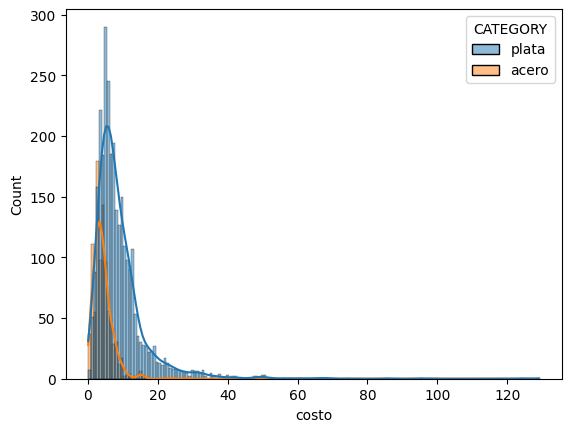

In [8]:

# Equivalent to:
sns.histplot(x = "costo", hue = "CATEGORY", data = clean_inventory, kde=True)


<Axes: xlabel='pvp', ylabel='Count'>

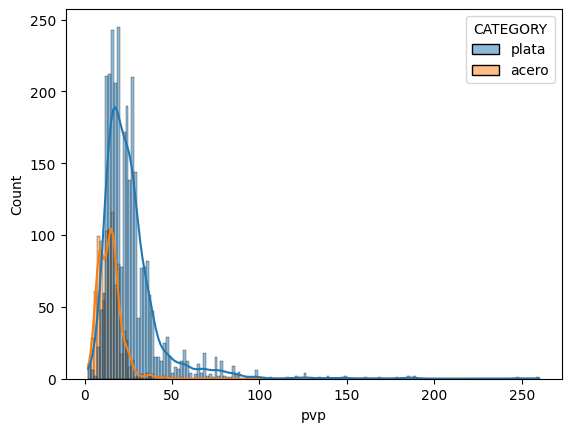

In [9]:
sns.histplot(x = "pvp", hue = "CATEGORY", data = clean_inventory, kde=True)

4. **Estadísticas Descriptivas por Tipo de Joya y Categoría:**
   - Calcular el mínimo, Q25, mediana, Q75 y máximo de cada tipo de joya (`source`) por cada categoría (`plata` y `acero`).

In [10]:
clean_inventory.groupby('CATEGORY')['pvp'].agg(
    min=('min'),
    q25=(lambda x: x.quantile(0.25)),
    q50=('median'),
    mean=('mean'),
    q75=(lambda x: x.quantile(0.75)),
    max=('max')
).reset_index()

,CATEGORY,min,q25,q50,mean,q75,max
0,acero,2.0,9.25,14.0,14.163529,17.5,54.75
1,plata,2.5,15.90,22.7,26.449202,29.5,260.00


5. **Tipo de Joya más Común por Material:**
   - Identificar el tipo de joya (anillos, pulseras, etc.) más común para cada material (`plata` y `acero`).

In [11]:
tipo_joya_df = clean_inventory.groupby(["CATEGORY","tipo"])["count_items"].count().reset_index().sort_values("count_items",ascending=False)

tipo_joya_df


,CATEGORY,tipo,count_items
12,plata,dijes,816
9,plata,aretes,735
8,plata,anillos,583
1,acero,aretes,454
13,plata,juegos,247
14,plata,pulseras,225
10,plata,cadenas,180
6,acero,pulseras,153
5,acero,juegos,109
11,plata,collares,87


6. **Análisis de Proporción de Inventario por Material:**
   - Calcular la proporción del inventario total que corresponde a `plata` y `acero`.

In [12]:
total_items = clean_inventory.groupby("CATEGORY")["count_items"].sum().reset_index().sort_values("count_items",ascending=False)
total_items

,CATEGORY,count_items
1,plata,9230
0,acero,4501


In [13]:
total_sum = total_items.count_items.sum()

proportions = total_items.count_items / total_sum

total_items["proportions"]= proportions

total_items

,CATEGORY,count_items,proportions
1,plata,9230,0.672202
0,acero,4501,0.327798


7. **Análisis de Proporción de Inventario por Tipo de Joya:**
   - Calcular la proporción de cada tipo de joya (anillos, pulseras, cadenas, etc.) en el inventario total.

In [14]:
total_tipos = clean_inventory.groupby("tipo")["count_items"].sum().reset_index().sort_values("count_items",ascending=False)

total_tipos

,tipo,count_items
1,aretes,6202
4,dijes,2225
6,pulseras,1736
2,cadenas,1244
0,anillos,1217
5,juegos,760
3,collares,301
7,varios,46


In [15]:
suma_tipo_joya = total_tipos["count_items"].sum()

proporciones = total_tipos.count_items / suma_tipo_joya

total_tipos["proporciones"] = proporciones

total_tipos



,tipo,count_items,proporciones
1,aretes,6202,0.451679
4,dijes,2225,0.162042
6,pulseras,1736,0.126429
2,cadenas,1244,0.090598
0,anillos,1217,0.088632
5,juegos,760,0.055349
3,collares,301,0.021921
7,varios,46,0.003350


8. **Análisis de Costo Promedio por Tipo de Joya y Categoría:**
   - Calcular el costo promedio por cada tipo de joya (`source`) y categoría (`plata` y `acero`).

In [16]:
costo_promedio_joya= pd.DataFrame(clean_inventory.groupby(["CATEGORY","tipo"])["costo"].mean().sort_values(ascending=False))
costo_promedio_joya_df = costo_promedio_joya.reset_index()
costo_promedio_joya_df

,CATEGORY,tipo,costo
0,plata,varios,18.706000
1,plata,collares,14.416839
2,plata,pulseras,13.754662
3,plata,juegos,13.289109
4,plata,cadenas,10.267664
5,plata,anillos,9.904134
6,plata,aretes,7.660230
7,acero,juegos,7.551835
8,plata,dijes,6.490719
9,acero,collares,5.329688


9. **Comparación de Márgenes de Ganancia:**
   - Comparar los márgenes de ganancia entre las joyas de `plata` y `acero` calculando la diferencia entre el `costo` y el `PVP`.

In [17]:
margen_ganancia = clean_inventory.pvp - clean_inventory.costo

clean_inventory["margen_ganancia"] = margen_ganancia

margen_tipo = clean_inventory.groupby("CATEGORY")["margen_ganancia"].sum().sort_values(ascending= False)

margen_tipo

CATEGORY
plata    49885.5305
acero     9278.3000
Name: margen_ganancia, dtype: float64

In [19]:
clean_inventory.groupby('CATEGORY')['margen_ganancia'].agg(
    min=('min'),
    q25=(lambda x: x.quantile(0.25)),
    q50=('median'),
    mean=('mean'),
    q75=(lambda x: x.quantile(0.75)),
    max=('max')
).reset_index()

,CATEGORY,min,q25,q50,mean,q75,max
0,acero,-0.5,6.75,9.80,9.923316,12.300,33.70
1,plata,-3.3,11.20,14.94,17.303340,19.625,130.88


10. **Análisis de Tendencias Temporales (si aplica):**
    - Si se dispone de datos temporales, analizar las tendencias de compra y venta de joyas a lo largo del tiempo.


11. **Identificación de Outliers en Costos y PVP:**
    - Utilizar métodos estadísticos para identificar valores atípicos en los costos y precios de venta al público.


In [21]:
analisis_costo =clean_inventory.groupby(["CATEGORY"])['costo'].agg(
    min=('min'),
    q25=(lambda x: x.quantile(0.25)),
    q50=('median'),
    mean=('mean'),
    q75=(lambda x: x.quantile(0.75)),
    max=('max')
).reset_index()

analisis_costo

,CATEGORY,min,q25,q50,mean,q75,max
0,acero,0.1,2.5,3.7,4.240214,5.5,28.00
1,plata,0.5,4.8,7.2,9.145862,11.0,129.12


In [22]:
analisis_pvp =clean_inventory.groupby(["CATEGORY"])['pvp'].agg(
    min=('min'),
    q25=(lambda x: x.quantile(0.25)),
    q50=('median'),
    mean=('mean'),
    q75=(lambda x: x.quantile(0.75)),
    max=('max')
).reset_index()

analisis_pvp

,CATEGORY,min,q25,q50,mean,q75,max
0,acero,2.0,9.25,14.0,14.163529,17.5,54.75
1,plata,2.5,15.90,22.7,26.449202,29.5,260.00



12. **Correlación entre Variables de Costo y PVP:**
    - Analizar la correlación entre el `costo` y el `PVP` para entender la relación entre estas variables.



13. **Segmentación de Proveedores por Volumen de Venta:**
    - Segmentar a los proveedores según el volumen de venta para identificar a los principales proveedores.

In [27]:
volumen_venta= clean_inventory.groupby('proveedor')["costo"].sum().reset_index().sort_values("costo",ascending= False)

volumen_venta



,proveedor,costo
35,SOLEDAD SAENZ,7283.6000
13,CIRKON,6241.2030
38,VOGA,4574.2005
2,ALPHA TRADING,2056.5600
3,ANDRES CADAVID,1949.5500
40,XAVIER GUILLEN,1902.8210
17,FLAVIO JARA,921.5800
14,FABIAN CARVAJAL,776.5500
26,LX USA,761.9300
1,ALINA PAZ,668.9700
